In [69]:
import numpy as np
import hw7Boundary_Conditions as bc
import hw7Poisson_1D as p1

# HW 7 Part 3: Evaluations on previous project problems
> Solve one of the problems again from Project 1 or 2. Comment on accuracy of your method as you continue to use higher-order polynomials. Is there any point at which refinement in h (element size) or p (polynomial degree) is no longer necessary given your problem conditions?


**Project 2, Problem 4: Electrostatic potential field**

Description
- Domain 
    - $\Omega = [0,1]$
- DE: 
    - $u_{xx} + \frac{\rho}{\epsilon_0} = 0$ on $\Omega$
- BCs
    - Neumann: $u_x(0) = h$
    - Robin: $u(L) + \delta u_x(L) = 0$ 
- Constants: 
    - $h$ = 1e0 V/m (flux at x = 0)
    - $\delta = 3 m^{-1}$
    - $L = 4 m$
    - $\rho = 12^{-10}x \frac{C}{m^4}$ (charge density as a function of $x$)
    - $\epsilon_0 = 8.854 * 10^{-12} \frac{C^2s^2}{kg*m^3}$ (permittivity of a vacuum)
- Unknown: 
    - $u(x)$ = electrostatic potential as a function of $x$
    - $u(L)$ = QOI

Problem data

In [70]:
rho = 12.0e-10
epsilon_0 = 8.854e-12
f_coeff = rho / epsilon_0
delta = 3.0
h = 1.0e0
L = 4
f = lambda x: f_coeff

bcl = bc.BoundaryCondition("left", "Neu", 0, 1, h)
bcr = bc.BoundaryCondition("right", "Rob", 1, delta, 0)

<!-- ### Generating solutions at $p=[1,2,3,4,5]$ for each $n\in[2, 4, 8, 16, 32, 64]$ -->
Generating solutions at $p=[1,2,3,4,5]$ for each $n\in[2, 4, 8, 16, 32, 64]$

In [71]:
class make_n_elem_all_degrees():
    def __init__(self, n_elem, bcl_, bcr_, f_):
        self.n_elem = n_elem
        self.bcl_ = bcl_
        self.bcr_  = bcr_ 
        self.f_ = f_
        self.xvals = p1.CreateXVals(0,1,self.n_elem)
        self.p_range = [1,2,3,4,5]
        self.loop = len(self.p_range)
        self.solutions_ = []
        for i in range(0,self.loop):
            p_ = self.p_range[i]
            # xvals = p1.CreateXVals(0,1,self.n_elem)
            sol = p1.FEM_Poisson(self.bcl_, self.bcr_, self.f_, self.xvals, p_)
            self.solutions_.append(sol)
        self.solutions = self.solutions_

e02_all_p = make_n_elem_all_degrees(2,bcl, bcr, f)
sol_n02_p1 = e02_all_p.solutions[0]
sol_n02_p2 = e02_all_p.solutions[1]
sol_n02_p3 = e02_all_p.solutions[2]
sol_n02_p4 = e02_all_p.solutions[3]
sol_n02_p5 = e02_all_p.solutions[4]
e04_all_p = make_n_elem_all_degrees(2,bcl, bcr, f)
sol_n04_p1 = e04_all_p.solutions[0]
sol_n04_p2 = e04_all_p.solutions[1]
sol_n04_p3 = e04_all_p.solutions[2]
sol_n04_p4 = e04_all_p.solutions[3]
sol_n04_p5 = e04_all_p.solutions[4]
e08_all_p = make_n_elem_all_degrees(8,bcl, bcr, f)
sol_n08_p1 = e08_all_p.solutions[0]
sol_n08_p2 = e08_all_p.solutions[1]
sol_n08_p3 = e08_all_p.solutions[2]
sol_n08_p4 = e08_all_p.solutions[3]
sol_n08_p5 = e08_all_p.solutions[4]
e16_all_p = make_n_elem_all_degrees(16, bcl, bcr, f)
sol_n16_p1 = e16_all_p.solutions[0]
sol_n16_p2 = e16_all_p.solutions[1]
sol_n16_p3 = e16_all_p.solutions[2]
sol_n16_p4 = e16_all_p.solutions[3]
sol_n16_p5 = e16_all_p.solutions[4]
e32_all_p = make_n_elem_all_degrees(32, bcl, bcr, f)
sol_n32_p1 = e32_all_p.solutions[0]
sol_n32_p2 = e32_all_p.solutions[1]
sol_n32_p3 = e32_all_p.solutions[2]
sol_n32_p4 = e32_all_p.solutions[3]
sol_n32_p5 = e32_all_p.solutions[4]
e64_all_p = make_n_elem_all_degrees(64, bcl, bcr, f)
sol_n64_p1 = e64_all_p.solutions[0]
sol_n64_p2 = e64_all_p.solutions[1]
sol_n64_p3 = e64_all_p.solutions[2]
sol_n64_p4 = e64_all_p.solutions[3]
sol_n64_p5 = e64_all_p.solutions[4]

## Comparing effects of refinement in *n* and *p*

### Reference plot: h=64, p=5 ('maximum' refinement)

On the assumption that at it will be the most accurate, let the reference plot be the one immediately below, representing the solution given by setting *n=64* (*h=0.015625*) and *p=5*.

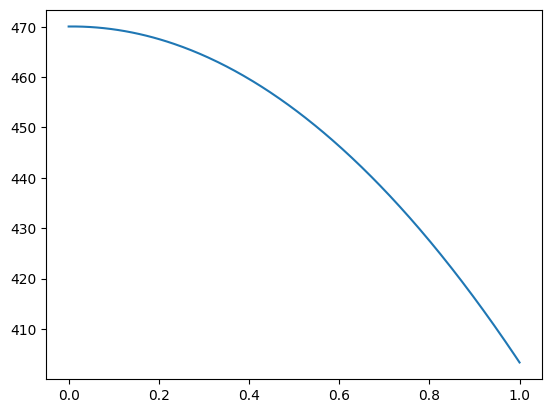

In [72]:
# REFERENCE PLOT
p1.PlotSolution(bcl, bcr, sol_n64_p5.plot_domain, sol_n64_p5.D).make_plot()

### Refinement in *h*

Now we fix *p=1* and compare solutions produced by increasing the number of elements from *n=1* (*h=1*) to *n=64* (*h=0.015625*). 

Qualitative evaluation (eyeballing) indicates that reference plot accuracy is not reached until *n=32*. (My eyeballs can't distinguish with any certainty between *n=32* and *n=64*, whereas under close inspection, the *n=16* plot is not quite a smooth curve)

##### *h=2*

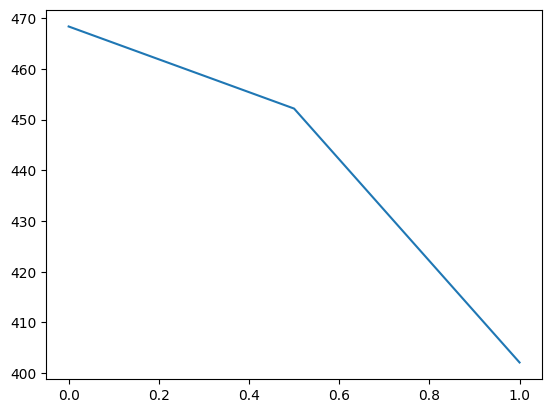

In [73]:
p1.PlotSolution(bcl, bcr, sol_n02_p1.plot_domain, sol_n02_p1.D).make_plot()

##### *h=4*

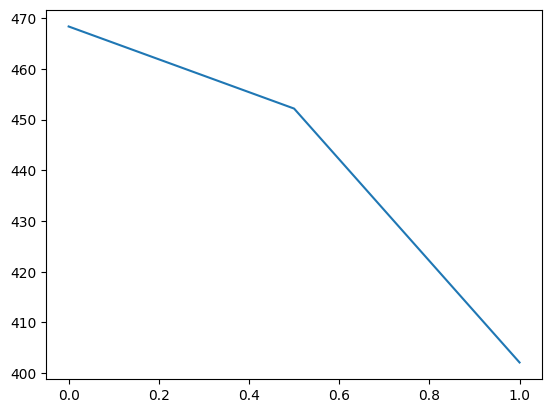

In [74]:
p1.PlotSolution(bcl, bcr, sol_n04_p1.plot_domain, sol_n04_p1.D).make_plot()

##### *h=8*

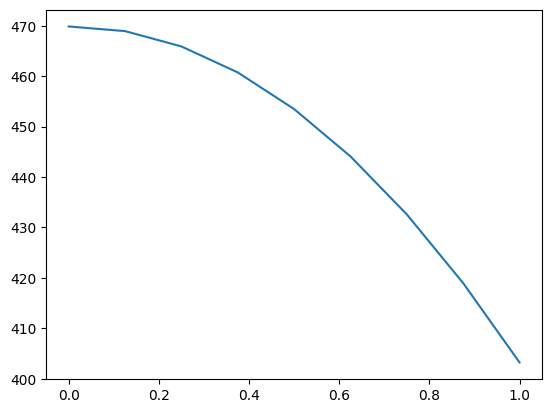

In [75]:
p1.PlotSolution(bcl, bcr, sol_n08_p1.plot_domain, sol_n08_p1.D).make_plot()

##### *h=16*

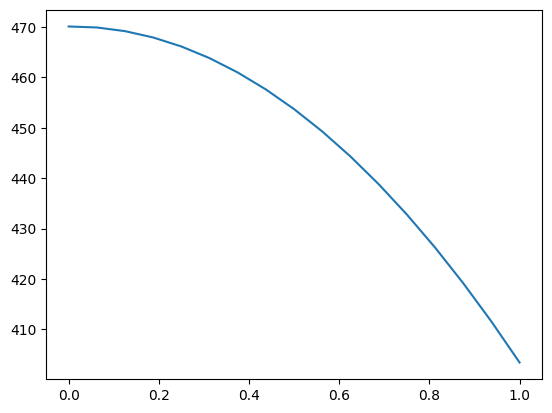

In [76]:
p1.PlotSolution(bcl, bcr, sol_n16_p1.plot_domain, sol_n16_p1.D).make_plot()


##### *h=32*

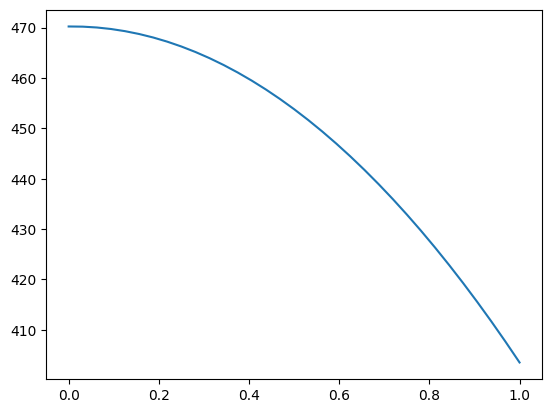

In [77]:
p1.PlotSolution(bcl, bcr, sol_n32_p1.plot_domain, sol_n32_p1.D).make_plot()


##### *h=64*

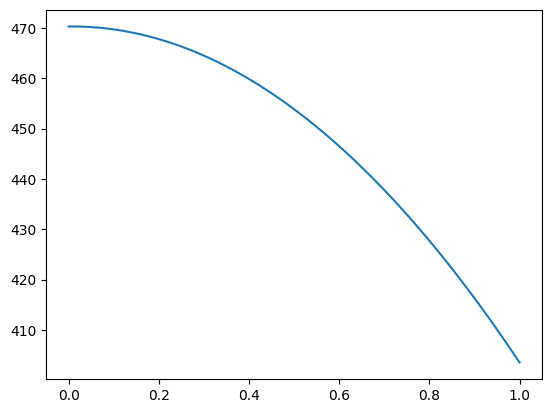

In [78]:
p1.PlotSolution(bcl, bcr, sol_n64_p1.plot_domain, sol_n64_p1.D).make_plot()


### Refinement in *p*

We now explore the effects of *p*-refinement. Since we know that *h*-refinement already yields max accuracy at *n=32*, the interesting question is whether we can achieve max accuracy for some *n<32* by refining in *p*. 

The plots below reveal the following:
- At a coarseness of *n=16*, we replicate the max accuracy plot at most *p=3* and possibly *p=2*. 
- At a coarseness of *n=8*, the solution remains blocky at *p=2* and possibly *p=3*. It is perfectly smooth at *p=5*, but differs from the max accuracy solution in that it is 'flattened' by a value of ~3 -- that is, it shows a maximum solution value at *x=0* of around 467, whereas the reference solution shows a value of 470 at that point. 
- At a coarseness of *n=4*, the same flattening occurs at all levels of *p*-refinement.

#### n = 16

##### *p=2*

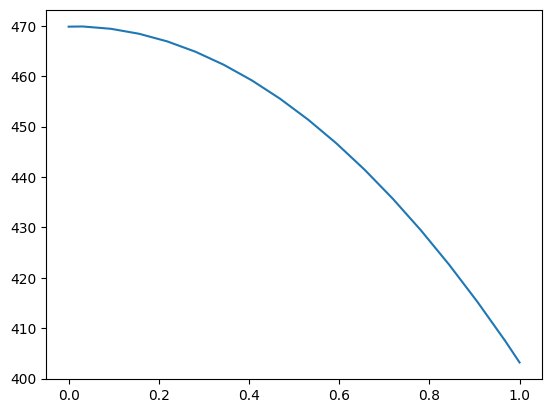

In [79]:
p1.PlotSolution(bcl, bcr, sol_n16_p2.plot_domain, sol_n16_p2.D).make_plot()

##### *p=3*

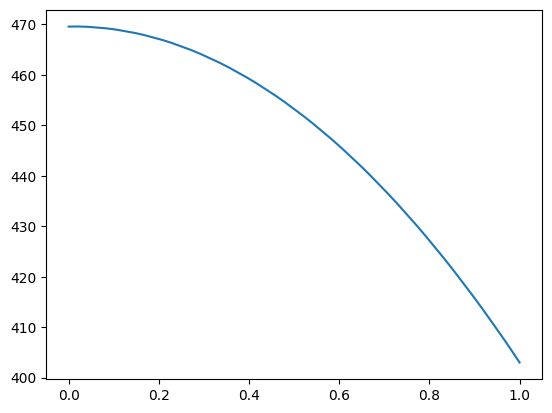

In [80]:
p1.PlotSolution(bcl, bcr, sol_n16_p3.plot_domain, sol_n16_p3.D).make_plot()

### *p*-refinement at *h=8*

##### *p=2*

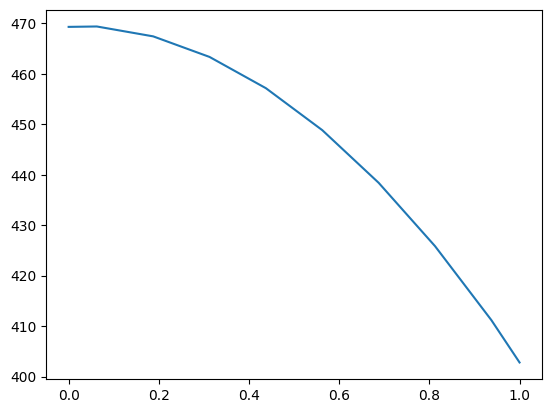

In [81]:
p1.PlotSolution(bcl, bcr, sol_n08_p2.plot_domain, sol_n08_p2.D).make_plot()

#### *p=3*

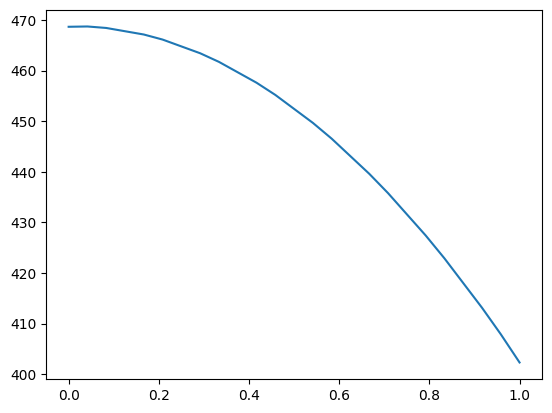

In [82]:
p1.PlotSolution(bcl, bcr, sol_n08_p3.plot_domain, sol_n08_p3.D).make_plot()

#### *p=5*

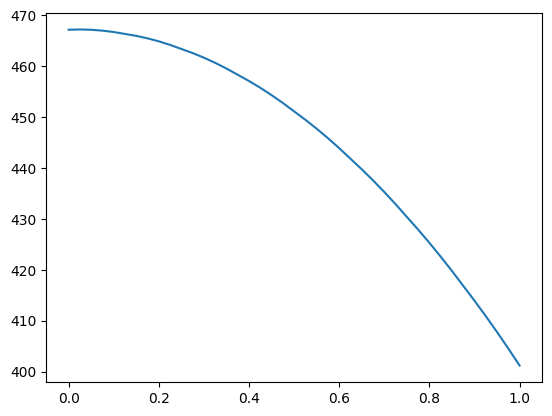

In [83]:
p1.PlotSolution(bcl, bcr, sol_n08_p5.plot_domain, sol_n08_p5.D).make_plot()

### *h=4*

##### *p=5*

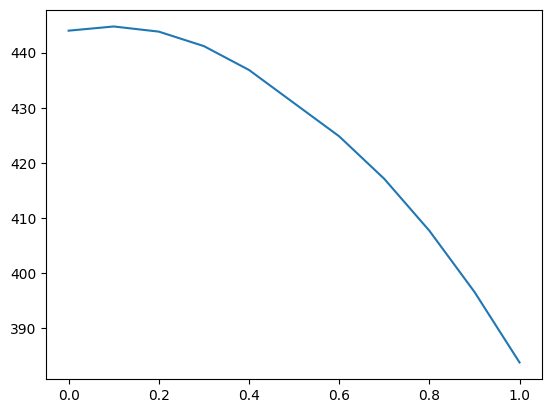

In [84]:
p1.PlotSolution(bcl, bcr, sol_n04_p5.plot_domain, sol_n04_p5.D).make_plot()